# Python Practical 9: Practical

## A)  Functions and modules

**1. F-measure**

The F-measure (F1 score) is a binary classification metric that can be
interpreted as a weighted average of precision and recall. It is commonly
used in the field of information retrieval (where often there is no
obvious way to define a true negative &mdash; for example, when retrieving
gene names from free text, is a true negative every non-gene word, or is
it every non-gene noun?). The F-measure ranges between +1 (best) and 0
(worst).

Write a script containing a function that calculates the F-measure. The
function should have 3 integer arguments &mdash; representing the number of
true positives (`tp`), false positives (`fp`) and false negatives (`fn`) &mdash; and
return the F-measure calculated according to the following formula:

`F1 = (2 x tp) / ((2 x tp) + fp + fn)`

The function should also have an appropriate docstring.

Call the function several times within your script using different
combinations of `tp`, `fp` and `fn`. Are there values of `tp`, `fp` and `fn` that
help you validate that your function is working?

In [8]:
def f_measure(tp, fp, fn: int) -> float:
    """
    Calculates the F-measure, or F1 Score - a weighted measure of accuracy and precision. 
    
    Args:
        tp: True Positive, integer
        fp: False Positive, integer
        fn: False Negative, integer
        
    Returns:
        The F1 binary classification between 0 and 1, where 1 is the most accurate/precise score.
    """
    
    F1 = (2 * tp) / ((2 * tp) + fp + fn)
    return F1

In [17]:
#print (f_measure(250, 16, 4))
#print (f_measure("a", "b", 3)) #TypeError: can only concatenate str (not "int") to str
#print (f_measure(True, True, False)) #accepts boolean as args since True = 1 and False = 0

#print (f_measure(90, 5)) #f_measure() missing 1 required positional argument: 'fn'
#print (f_measure(90, 50, 6, 23)) #TypeError: f_measure() takes 3 positional arguments but 4 were given

#print (f_measure(0, 0, 0)) #ZeroDivisionError: division by zero
#print (f_measure(0,10,40)) #accepts since the 0 is not in denominator of F1 equation
help (f_measure)

0.9615384615384616
0.6666666666666666
0.0
Help on function f_measure in module __main__:

f_measure(tp, fp, fn: int) -> float
    Calculates the F-measure, or F1 Score, in the absence of a True Negative value. 
    
    Args:
        tp: True Positive, integer
        fp: False Positive, integer
        fn: False Negative, integer
        
    Returns:
        The F1 binary classification of average precision and recall between 0 and 1, where 1 is the most accurate/precise score.



**2. MCC**

The Matthews correlation coefficient (MCC) is a binary classification
metric commonly used to measure the performance of bioinformatics
machine-learning classifiers (e.g. secondary structure predictors). The
MCC ranges between +1 (perfect predictions) and -1 (predictions
completely anti-correlated with the correct answer). Scores around
zero are what one would expect for random predictions.

Write a script containing a function that calculates the MCC. The
function should have 4 integer arguments &mdash; representing the number of
true positive (`tp`), false positives (`fp`), true negatives (`tn`) and false
negatives (`fn`) &mdash; and return the MCC calculated according to the
following formula:

`MCC = (tp x tn - fp x fn) / sqrt( (tp + fp)(tp + fn)(tn + fp)(tn + fn) )`

The function should also have an appropriate docstring.

Call the function several times within your script using different
combinations of `tp`, `fp`, `tn` and `fn`. Are there values of `tp`, `fp`, `tn` and
`fn` that help you validate that your function is working?


In [25]:
def mcc(tp, fp, tn, fn: int) -> float:
    """
    Calculates the Matthews correlation coefficient, or MCC, to measure performance of machine learning algorithms.
    
    Args:
        tp: True Positive, integer
        fp: False Positive, integer
        fn: False Negative, integer
        tn: True Negative, integer
    
    Returns:
        MCC value, a float between -1 and +1, where +1 is a perfectly correlated prediction and -1 is anti-correlated. A score of 0 indicates random prediction.
    """
    import math
    MCC = ((tp * tn) - (fp * fn)) / math.sqrt( (tp + fp)*(tp + fn)*(tn + fp)*(tn + fn) )
    return MCC


In [38]:
#print (mcc(250, 16, 4, 40)) #0.043693954030054244
#print (mcc("a", "b", 3)) #TypeError: can only concatenate str (not "int") to str
#print (mcc(False, True, True, True)) #accepts boolean as args since True = 1 and False = 0

#print (mcc(90, 5)) #f_measure() missing 2 required positional argument: 'tn' and fn'
#print (mcc(90, 50, 6, 23, 100)) #TypeError: f_measure() takes 4 positional arguments but 5 were given

#print (mcc(0, 0, 0, 0)) #ZeroDivisionError: float division by zero
#print (mcc(0,10,40,90)) #accepts since the 0 is not in denominator of F1 equation
help (mcc)

-0.3721042037676254
Help on function mcc in module __main__:

mcc(tp, fp, tn, fn: int) -> float
    Calculates the Matthews correlation coefficient, or MCC, to measure performance of machine learning algorithms.
    
    Args:
        tp: True Positive, integer
        fp: False Positive, integer
        fn: False Negative, integer
        tn: True Negative, integer
    
    Returns:
        MCC value, a float between -1 and +1, where +1 is a perfectly correlated prediction and -1 is anti-correlated. A score of 0 indicates random prediction.



**3. Binary classification metric module**

Place your MCC and F-measure functions in a module and write a script
that invokes both of them. How do the measures compare when `tp = tn` and `fp = fn`?

In [47]:
import classification as c

F1 = c.f_measure(60, 15, 15)
MCC = c.mcc(60, 15, 60, 15)

print ("F1:", F1, "MCC:", MCC)

F1: 0.8 MCC: 0.6


## B) Matplotlib

**1. PDB source species pie chart**

Create a pie chart from the data in file `pdb_counts.txt` showing the
distribution of released structures in the Protein Data Bank by organism
(excluding entries from a non-natural source). Here are the contents of the file:

In [48]:
cat ../data/pdb_counts.txt

Thermus thermophilus: 7839
Escherichia coli: 5183
Saccharomyces cerevisiae: 4938
Homo sapiens: 3385
Bos taurus: 2727
Haloarcula marismortui: 2067
Oryctolagus cuniculus: 1791
Other: 16365


Label the wedges with a percentage of the overall number. The colors argument should be
used to provide (quoting the documentation) “a sequence of matplotlib
color args through which the pie chart will cycle.” Here is a simple
example:

`colors=['b', 'g', 'r', 'c', 'm', 'y']`

<function matplotlib.pyplot.show(close=None, block=None)>

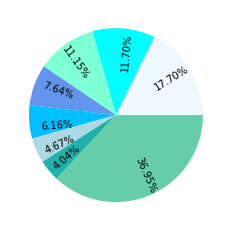

In [132]:
pdb_counts_fname = '../data/pdb_counts.txt'

import matplotlib.pyplot as plt

counts = []
total = 0

with open (pdb_counts_fname, 'r') as file:
    line = file.read().splitlines()
    for i in line:
        i = i.split(sep=":") # separates the name from the count
        counts.append(i[1].lstrip()) # adds the counts to the list, removes whitespace at the start
        total += int(i[1]) # adds count to running total

percent = [int(i) / total * 100 for i in counts] # gets % of each count
percent = [f"{i:.2f}%" for i in percent] # formats % to look nicer (to 2 dp and with % sign)

fig, axes = plt.subplots()
axes.pie (counts, 
          labels = percent, 
          rotatelabels=True, 
          labeldistance = 0.5, 
          colors = ["AliceBlue", "Aqua", "Aquamarine", "CornflowerBlue", "DeepSkyBlue", "LightBlue", "LightSeaGreen", "MediumAquaMarine"])
plt.show

**2. Histogram with multiple distributions**

The `hist()` function can be used to plot multiple sets of data (i.e.
multiple columns per histogram bin) by passing a 2D `ndarray` as the first
parameter. Create 3 sets of 1000 numbers drawn from a normal, logistic
and Laplace distribution respectively (using default distribution
parameters). For example, this draws 1000 random numbers from a
Laplace distribution:

`data = np.random.laplace(size=1000)`

Note that you may get a warning if the 2D data array is in the wrong
orientation (3 x 1000 instead of 1000 x 3). In this case, one option is to
switch orientation using `transpose()`.

Try generating a plot with 20 bins. Modify your plot so that each
dataset has a different colour from those supplied by default; this
involves creating a list of colour names (3 strings) and passing the list as
an argument to the `hist()` function using the color keyword.

<function matplotlib.pyplot.show(close=None, block=None)>

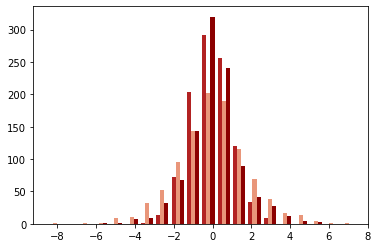

In [215]:
import numpy as np
rng = np.random.default_rng()     

normal = rng.normal(size = 1000)
logistic = rng.logistic(size = 1000)
laplace = rng.laplace(size = 1000)

plt.hist((normal, logistic, laplace), 
         bins = 20, 
         color = ["FireBrick", "DarkSalmon", "DarkRed"])
plt.show

In [182]:
help(plt.hist)

Help on function hist in module matplotlib.pyplot:

hist(x, bins=None, range=None, density=False, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, *, data=None, **kwargs)
    Plot a histogram.
    
    Compute and draw the histogram of *x*.  The return value is a tuple
    (*n*, *bins*, *patches*) or ([*n0*, *n1*, ...], *bins*, [*patches0*,
    *patches1*, ...]) if the input contains multiple data.  See the
    documentation of the *weights* parameter to draw a histogram of
    already-binned data.
    
    Multiple data can be provided via *x* as a list of datasets
    of potentially different length ([*x0*, *x1*, ...]), or as
    a 2-D ndarray in which each column is a dataset.  Note that
    the ndarray form is transposed relative to the list form.
    
    Masked arrays are not supported.
    
    The *bins*, *range*, *weights*, and *density* parameters behave as in
    `

**3. Bubble plot**

Create a scatter plot using the data in file `bubbles.txt`. This file has
3 columns of data: `x-coordinates`, `y-coordinates`, and `magnitudes`. Here are the first few lines:

In [193]:
%%bash
head -5 ../data/bubbles.txt

2.3 2.1 800
2.9 2.9 800
3.5 2.9 1200
4.4 5.2 400
5.7 5.3 1000


These should be treated as the *x*- and *y*-coordinates of the centre of a circle,
and the area of a circle respectively. Circles should have a transparency
of 0.5 (keyword `alpha`) and colour goldenrod (keyword `c`). Add
axis labels “actual” (*x*-axis) and “predicted” (*y*-axis) using the same
approach that was used to add labels to the simple plot in the Matplotlib video. 

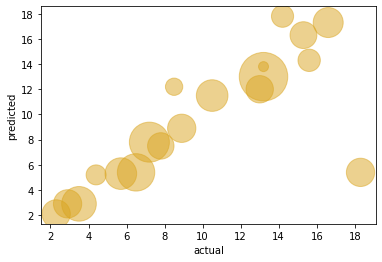

In [213]:
bubbles_fname = '../data/bubbles.txt'

with open (bubbles_fname, 'r') as file:
    line = file.read().splitlines()
    x = []
    y = []
    mag = []
    for data in line:
        data = data.split(sep = " ")
        x.append(float(data[0]))
        y.append(float(data[1]))
        mag.append(float(data[2]))
        
fig, axes = plt.subplots()
axes.scatter(x, 
             y, 
             mag, 
             c = "goldenrod", 
             alpha = 0.5)
axes.set_xlabel("actual")
axes.set_ylabel("predicted")
plt.show()

In [203]:
help(axes.scatter)

Help on method scatter in module matplotlib.axes._axes:

scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, verts=<deprecated parameter>, edgecolors=None, *, plotnonfinite=False, data=None, **kwargs) method of matplotlib.axes._subplots.AxesSubplot instance
    A scatter plot of *y* vs. *x* with varying marker size and/or color.
    
    Parameters
    ----------
    x, y : float or array-like, shape (n, )
        The data positions.
    
    s : float or array-like, shape (n, ), optional
        The marker size in points**2.
        Default is ``rcParams['lines.markersize'] ** 2``.
    
    c : array-like or list of colors or color, optional
        The marker colors. Possible values:
    
        - A scalar or sequence of n numbers to be mapped to colors using
          *cmap* and *norm*.
        - A 2-D array in which the rows are RGB or RGBA.
        - A sequence of colors of length n.
        - A single color format s